## Deep Learning for Text

We will be constructing a bunch of models and see how well they perform on text classification tasks.
Let's start with imports and data and do this!

In [1]:
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

Using Theano backend.


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_df = pd.read_csv('data/congress_train.csv', encoding = "ISO-8859-1").dropna()
valid_df = pd.read_csv('data/congress_val.csv',encoding = "ISO-8859-1").dropna()
test_df = pd.read_csv('data/congress_test.csv',encoding = "ISO-8859-1").dropna()

In [4]:
train_text = list(train_df['Title'])
train_text = [str(i) for i in train_text]
valid_text = list(valid_df['Title'])
valid_text = [str(i) for i in valid_text]
test_text = list(test_df['Title'])
test_text = [str(i) for i in test_text]

In [5]:
train_y = to_categorical(list(train_df['Major']))
valid_y = to_categorical(list(valid_df['Major']))
test_y = to_categorical(list(test_df['Major']))

In [6]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_text)

In [7]:
train_seq = tokenizer.texts_to_sequences(train_text)
test_seq = tokenizer.texts_to_sequences(test_text)
valid_seq = tokenizer.texts_to_sequences(valid_text)

In [8]:
train_x = pad_sequences(train_seq, maxlen=100)
test_x = pad_sequences(test_seq, maxlen=100)
valid_x = pad_sequences(valid_seq, maxlen=100)

Now that we've set up our data, we can start by setting up our imports for our model and create our models.

NOTE: I initially started with 128 dimensions for the model embeddings and recevied pretty high accuracies, but it was taking WAY too long. Reduced it to 32 dimensions.

In [9]:
from keras.layers import Embedding, Flatten, Dense
from keras.models import Sequential
from keras.layers import SimpleRNN
from keras.layers import LSTM
from keras.layers import GRU


We start with a standard feed forward network with embeddings with 128 dimensions.

In [10]:
feedforward = Sequential()

In [11]:
feedforward.add(Embedding(10000, 128, input_length=100))
feedforward.add(Flatten())
feedforward.add(Dense(24, activation='softmax'))
feedforward.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
history_feedforward = feedforward.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=50, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/50
278612/278612 [==============================] - 61s 219us/step - loss: 1.2890 - acc: 0.6538 - val_loss: 0.7000 - val_acc: 0.8138
Epoch 2/50
278612/278612 [==============================] - 54s 192us/step - loss: 0.5994 - acc: 0.8359 - val_loss: 0.6017 - val_acc: 0.8385
Epoch 3/50
278612/278612 [==============================] - 54s 193us/step - loss: 0.5018 - acc: 0.8609 - val_loss: 0.5696 - val_acc: 0.8473
Epoch 4/50
278612/278612 [==============================] - 61s 220us/step - loss: 0.4429 - acc: 0.8767 - val_loss: 0.5586 - val_acc: 0.8527
Epoch 5/50
278612/278612 [==============================] - 55s 199us/step - loss: 0.3979 - acc: 0.8885 - val_loss: 0.5502 - val_acc: 0.8550
Epoch 6/50
278612/278612 [==============================] - 54s 194us/step - loss: 0.3599 - acc: 0.8987 - val_loss: 0.5501 - val_acc: 0.8555
Epoch 7/50
278612/278612 [==============================] - 56s 202us/step - loss: 0.3275 - acc: 0.9074

We construct a simple RNN with 128 dimensional embeddings.

In [13]:
rnn = Sequential()

In [14]:
rnn.add(Embedding(10000, 128, input_length=100))
rnn.add(SimpleRNN(128))
rnn.add(Dense(24, activation='softmax'))
rnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
history_rnn = rnn.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=50, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/50
278612/278612 [==============================] - 346s 1ms/step - loss: 1.6117 - acc: 0.5493 - val_loss: 1.0364 - val_acc: 0.7199
Epoch 2/50
278612/278612 [==============================] - 346s 1ms/step - loss: 0.7364 - acc: 0.8031 - val_loss: 0.8671 - val_acc: 0.7686
Epoch 3/50
278612/278612 [==============================] - 346s 1ms/step - loss: 0.6146 - acc: 0.8334 - val_loss: 0.8260 - val_acc: 0.7746
Epoch 4/50
278612/278612 [==============================] - 352s 1ms/step - loss: 0.5473 - acc: 0.8506 - val_loss: 0.7126 - val_acc: 0.8087
Epoch 5/50
278612/278612 [==============================] - 349s 1ms/step - loss: 0.5003 - acc: 0.8628 - val_loss: 0.7000 - val_acc: 0.8140
Epoch 6/50
278612/278612 [==============================] - 346s 1ms/step - loss: 0.4623 - acc: 0.8724 - val_loss: 0.7266 - val_acc: 0.8050
Epoch 7/50
278612/278612 [==============================] - 345s 1ms/step - loss: 0.4301 - acc: 0.8803 - val_

LSTM with embeddings of 32 dimensions.

In [19]:
lstm = Sequential()

In [20]:
lstm.add(Embedding(10000, 32, input_length=100))
lstm.add(LSTM(32))
lstm.add(Dense(24, activation='softmax'))
lstm.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
history_lstm = lstm.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=50, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/50
278612/278612 [==============================] - 210s 753us/step - loss: 2.0756 - acc: 0.4042 - val_loss: 1.4276 - val_acc: 0.6153
Epoch 2/50
278612/278612 [==============================] - 1619s 6ms/step - loss: 1.1010 - acc: 0.7127 - val_loss: 1.0138 - val_acc: 0.7370
Epoch 3/50
278612/278612 [==============================] - 207s 743us/step - loss: 0.8138 - acc: 0.7942 - val_loss: 0.8117 - val_acc: 0.7892
Epoch 4/50
278612/278612 [==============================] - 222s 796us/step - loss: 0.6884 - acc: 0.8230 - val_loss: 0.7916 - val_acc: 0.7918
Epoch 5/50
278612/278612 [==============================] - 202s 725us/step - loss: 0.6182 - acc: 0.8379 - val_loss: 0.6472 - val_acc: 0.8279
Epoch 6/50
278612/278612 [==============================] - 193s 694us/step - loss: 0.5709 - acc: 0.8474 - val_loss: 0.6139 - val_acc: 0.8350
Epoch 7/50
278612/278612 [==============================] - 201s 723us/step - loss: 0.5386 - acc: 

GRU with enbeddings layer of 32

In [22]:
gru = Sequential()

In [23]:
gru.add(Embedding(10000, 32, input_length=100))
gru.add(GRU(32))
gru.add(Dense(24, activation='softmax'))
gru.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [24]:
history_gru = gru.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=50, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/50
278612/278612 [==============================] - 169s 607us/step - loss: 2.4266 - acc: 0.2713 - val_loss: 1.9469 - val_acc: 0.4268
Epoch 2/50
278612/278612 [==============================] - 169s 608us/step - loss: 1.4915 - acc: 0.6026 - val_loss: 1.3342 - val_acc: 0.6525
Epoch 3/50
278612/278612 [==============================] - 169s 608us/step - loss: 1.0265 - acc: 0.7437 - val_loss: 0.9312 - val_acc: 0.7667
Epoch 4/50
278612/278612 [==============================] - 171s 612us/step - loss: 0.8114 - acc: 0.7955 - val_loss: 0.7990 - val_acc: 0.7983
Epoch 5/50
278612/278612 [==============================] - 170s 609us/step - loss: 0.6905 - acc: 0.8218 - val_loss: 0.7087 - val_acc: 0.8202
Epoch 6/50
278612/278612 [==============================] - 170s 609us/step - loss: 0.6174 - acc: 0.8361 - val_loss: 0.6389 - val_acc: 0.8303
Epoch 7/50
278612/278612 [==============================] - 170s 609us/step - loss: 0.5693 - acc:

For our first custom model we use higher dimensional embedding for a double RNN.

In [25]:
model_1 = Sequential()

In [26]:
model_1.add(Embedding(10000, 50, input_length=100))
model_1.add(SimpleRNN(50, return_sequences=True))
model_1.add(SimpleRNN(50))
model_1.add(Dense(24, activation='softmax'))
model_1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [27]:
history_model_1 = model_1.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=20, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/20
278612/278612 [==============================] - 266s 955us/step - loss: 1.7092 - acc: 0.5231 - val_loss: 1.2172 - val_acc: 0.6731
Epoch 2/20
278612/278612 [==============================] - 226s 812us/step - loss: 0.9858 - acc: 0.7406 - val_loss: 0.9502 - val_acc: 0.7518
Epoch 3/20
278612/278612 [==============================] - 225s 807us/step - loss: 0.8051 - acc: 0.7899 - val_loss: 0.8432 - val_acc: 0.7821
Epoch 4/20
278612/278612 [==============================] - 223s 802us/step - loss: 0.7025 - acc: 0.8158 - val_loss: 0.9199 - val_acc: 0.7561
Epoch 5/20
278612/278612 [==============================] - 225s 809us/step - loss: 0.6405 - acc: 0.8305 - val_loss: 0.8847 - val_acc: 0.7651
Epoch 6/20
278612/278612 [==============================] - 225s 806us/step - loss: 0.5841 - acc: 0.8460 - val_loss: 0.7682 - val_acc: 0.8016
Epoch 7/20
278612/278612 [==============================] - 224s 804us/step - loss: 0.5500 - acc:

We continue using higher dimensions and also add a LSTM cell, and with the ADAM optimiser.

In [28]:
model_2 = Sequential()

In [29]:
model_2.add(Embedding(10000, 50, input_length=100))
model_2.add(SimpleRNN(50, return_sequences=True))
model_2.add(SimpleRNN(50, return_sequences=True))
model_2.add(LSTM(50))
model_2.add(Dense(24, activation='softmax'))
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [30]:
history_model_2 = model_2.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=20, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/20
278612/278612 [==============================] - 565s 2ms/step - loss: 1.6714 - acc: 0.5211 - val_loss: 1.0279 - val_acc: 0.7318
Epoch 2/20
278612/278612 [==============================] - 605s 2ms/step - loss: 0.8383 - acc: 0.7807 - val_loss: 0.7368 - val_acc: 0.8048
Epoch 3/20
278612/278612 [==============================] - 564s 2ms/step - loss: 0.6401 - acc: 0.8285 - val_loss: 0.6351 - val_acc: 0.8280
Epoch 4/20
278612/278612 [==============================] - 536s 2ms/step - loss: 0.5459 - acc: 0.8503 - val_loss: 0.5848 - val_acc: 0.8412
Epoch 5/20
278612/278612 [==============================] - 533s 2ms/step - loss: 0.4862 - acc: 0.8636 - val_loss: 0.5638 - val_acc: 0.8443
Epoch 6/20
278612/278612 [==============================] - 523s 2ms/step - loss: 0.4391 - acc: 0.8755 - val_loss: 0.5501 - val_acc: 0.8493
Epoch 7/20
278612/278612 [==============================] - 520s 2ms/step - loss: 0.4007 - acc: 0.8843 - val_

We now experiment with the adagrad optimiser.

In [31]:
model_3 = Sequential()

In [32]:
model_3.add(Embedding(10000, 50, input_length=100))
model_3.add(SimpleRNN(50, dropout=0.2))
model_3.add(Dense(24, activation='softmax'))
model_3.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])

/Users/bhargavvader/open_source/perspectives/venv/lib/python3.5/site-packages/keras/layers/recurrent.py:1036: UserWarning: RNN dropout is no longer supported with the Theano backend due to technical limitations. You can either set `dropout` and `recurrent_dropout` to 0, or use the TensorFlow backend.
  'RNN dropout is no longer supported with the Theano backend '


In [33]:
history_model_3 = model_3.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=20, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/20
278612/278612 [==============================] - 114s 409us/step - loss: 1.7839 - acc: 0.4940 - val_loss: 1.2713 - val_acc: 0.6649
Epoch 2/20
278612/278612 [==============================] - 114s 410us/step - loss: 1.0589 - acc: 0.7202 - val_loss: 1.0175 - val_acc: 0.7285
Epoch 3/20
278612/278612 [==============================] - 114s 411us/step - loss: 0.8940 - acc: 0.7687 - val_loss: 1.2478 - val_acc: 0.6565
Epoch 4/20
278612/278612 [==============================] - 115s 412us/step - loss: 0.8069 - acc: 0.7936 - val_loss: 0.9816 - val_acc: 0.7327
Epoch 5/20
278612/278612 [==============================] - 113s 406us/step - loss: 0.7467 - acc: 0.8097 - val_loss: 0.8511 - val_acc: 0.7800
Epoch 6/20
278612/278612 [==============================] - 114s 410us/step - loss: 0.7053 - acc: 0.8199 - val_loss: 0.8032 - val_acc: 0.7953
Epoch 7/20
278612/278612 [==============================] - 114s 408us/step - loss: 0.6730 - acc:

We use another variation of an LSTM.

In [34]:
model_4 = Sequential()

In [35]:
model_4.add(Embedding(10000, 50, input_length=100))
model_4.add(LSTM(50, dropout=0.2))
model_4.add(Dense(24, activation='softmax'))
model_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/Users/bhargavvader/open_source/perspectives/venv/lib/python3.5/site-packages/keras/layers/recurrent.py:2155: UserWarning: RNN dropout is no longer supported with the Theano backend due to technical limitations. You can either set `dropout` and `recurrent_dropout` to 0, or use the TensorFlow backend.
  'RNN dropout is no longer supported with the Theano backend '


In [37]:
history_model_4 = model_4.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=20, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/20
278612/278612 [==============================] - 315s 1ms/step - loss: 1.7095 - acc: 0.5238 - val_loss: 0.9190 - val_acc: 0.7684
Epoch 2/20
278612/278612 [==============================] - 313s 1ms/step - loss: 0.7745 - acc: 0.8023 - val_loss: 0.6990 - val_acc: 0.8192
Epoch 3/20
278612/278612 [==============================] - 315s 1ms/step - loss: 0.6174 - acc: 0.8379 - val_loss: 0.6320 - val_acc: 0.8332
Epoch 4/20
278612/278612 [==============================] - 311s 1ms/step - loss: 0.5444 - acc: 0.8534 - val_loss: 0.5977 - val_acc: 0.8385
Epoch 5/20
278612/278612 [==============================] - 301s 1ms/step - loss: 0.4975 - acc: 0.8629 - val_loss: 0.5751 - val_acc: 0.8445
Epoch 6/20
278612/278612 [==============================] - 299s 1ms/step - loss: 0.4626 - acc: 0.8705 - val_loss: 0.5572 - val_acc: 0.8484
Epoch 7/20
278612/278612 [==============================] - 300s 1ms/step - loss: 0.4352 - acc: 0.8764 - val_

We now use GRU with higher dimensional embeddings and ADAGRAD optimer.

In [38]:
model_5 = Sequential()

In [39]:
model_5.add(Embedding(10000, 50, input_length=100))
model_5.add(GRU(50, dropout=0.2))
model_5.add(Dense(24, activation='softmax'))
model_5.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])

/Users/bhargavvader/open_source/perspectives/venv/lib/python3.5/site-packages/keras/layers/recurrent.py:1610: UserWarning: RNN dropout is no longer supported with the Theano backend due to technical limitations. You can either set `dropout` and `recurrent_dropout` to 0, or use the TensorFlow backend.
  'RNN dropout is no longer supported with the Theano backend '


In [40]:
result_model_5 = model_5.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=20, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/20
278612/278612 [==============================] - 223s 799us/step - loss: 1.7245 - acc: 0.5185 - val_loss: 1.1858 - val_acc: 0.6862
Epoch 2/20
278612/278612 [==============================] - 209s 749us/step - loss: 1.0172 - acc: 0.7386 - val_loss: 0.9367 - val_acc: 0.7596
Epoch 3/20
278612/278612 [==============================] - 207s 742us/step - loss: 0.8248 - acc: 0.7925 - val_loss: 0.8157 - val_acc: 0.7971
Epoch 4/20
278612/278612 [==============================] - 208s 746us/step - loss: 0.7384 - acc: 0.8156 - val_loss: 0.7634 - val_acc: 0.8093
Epoch 5/20
278612/278612 [==============================] - 221s 793us/step - loss: 0.6855 - acc: 0.8274 - val_loss: 0.7315 - val_acc: 0.8169
Epoch 6/20
278612/278612 [==============================] - 222s 795us/step - loss: 0.6510 - acc: 0.8351 - val_loss: 0.7101 - val_acc: 0.8208
Epoch 7/20
278612/278612 [==============================] - 227s 815us/step - loss: 0.6253 - acc:

We now plot the results!

In [44]:
loss_ff = history_feedforward.history['val_loss']
loss_rnn = history_rnn.history['val_loss']
loss_lstm = history_lstm.history['val_loss']
loss_gru = history_gru.history['val_loss']
loss_model_1 = history_model_1.history['val_loss']
loss_model_2 = history_model_2.history['val_loss']
loss_model_3 = history_model_3.history['val_loss']
loss_model_4 = history_model_4.history['val_loss']
loss_model_5 = result_model_5.history['val_loss']

In [43]:
acc_ff = history_feedforward.history['val_acc']
acc_rnn = history_rnn.history['val_acc']
acc_lstm = history_lstm.history['val_acc']
acc_gru = history_gru.history['val_acc']
acc_model_1 = history_model_1.history['val_acc']
acc_model_2 = history_model_2.history['val_acc']
acc_model_3 = history_model_3.history['val_acc']
acc_model_4 = history_model_4.history['val_acc']
acc_model_5 = result_model_5.history['val_acc']

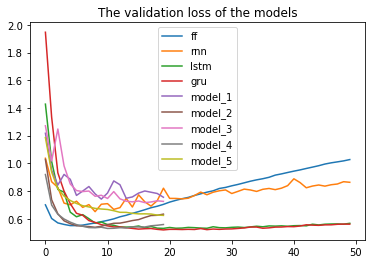

In [45]:
plt.plot(loss_ff)
plt.plot(loss_rnn)
plt.plot(loss_lstm)
plt.plot(loss_gru)
plt.plot(loss_model_1)
plt.plot(loss_model_2)
plt.plot(loss_model_3)
plt.plot(loss_model_4)
plt.plot(loss_model_5)
plt.legend(['ff', 'rnn', 'lstm', 'gru', 'model_1', 'model_2', 'model_3', 'model_4', 'model_5'])
plt.title('The validation loss of the models')
plt.show()

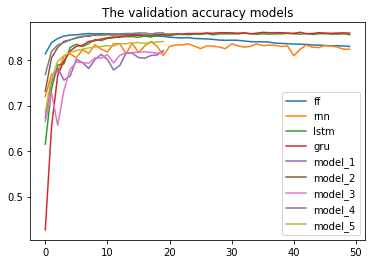

In [46]:
plt.plot(acc_ff)
plt.plot(acc_rnn)
plt.plot(acc_lstm)
plt.plot(acc_gru)
plt.plot(acc_model_1)
plt.plot(acc_model_2)
plt.plot(acc_model_3)
plt.plot(acc_model_4)
plt.plot(acc_model_5)
plt.legend(['ff', 'rnn', 'lstm', 'gru', 'model_1', 'model_2', 'model_3', 'model_4', 'model_5'])
plt.title('The validation accuracy models')
plt.show()

In [48]:
lstm.evaluate(test_x, test_y)

38693/38693 [==============================] - 11s 292us/step


[0.5727670295516608, 0.8588375158312771]

In [49]:
rnn.evaluate(test_x, test_y)

38693/38693 [==============================] - 18s 470us/step


[0.8708884593202277, 0.8241800842545061]

In [50]:
feedforward.evaluate(test_x, test_y)

38693/38693 [==============================] - 2s 41us/step


[1.0543117769676966, 0.8302276897660872]

Some notes: we trained the last few models only on 20 epochs. Adding different variations didn't do a great job, and it seems that our LSTM performs the best with about 86% accuracy.

This is still not as good as a human tagging it which reached 95% accuracy.